In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    finalNumber1: int

    number3: int
    operation2: str
    number4: int
    finalNumber2:int

In [4]:
#first half of the graph
def adder1 (state:AgentState) -> AgentState:
    """first adder"""
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtractor1 (state:AgentState) -> AgentState:
    """first subtractor"""
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def decide_next_node_1 (state:AgentState) -> AgentState:
    """first decision node"""
    if state["operation1"] == "+":
        return "addition_operation_1"
    if state["operation1"] == "-":
        return "subtraction_operation_1"
    
#second half of the graph
def adder2 (state:AgentState) -> AgentState:
    """first adder"""
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtractor2 (state:AgentState) -> AgentState:
    """first subtractor"""
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decide_next_node_2 (state:AgentState) -> AgentState:
    """first decision node"""
    if state["operation2"] == "+":
        return "addition_operation_2"
    if state["operation2"] == "-":
        return "subtraction_operation_2"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node_1", adder1)
graph.add_node("subtract_node_1", subtractor1)
graph.add_node("router1", lambda state:state)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node_1,
    {
        "addition_operation_1" : "add_node_1",
        "subtraction_operation_1": "subtract_node_1"
    }
)

graph.add_edge("add_node_1", "router2")
graph.add_edge("subtract_node_1", "router2")


graph.add_node("add_node_2", adder2)
graph.add_node("subtract_node_2", subtractor2)
graph.add_node("router2", lambda state:state)

graph.add_conditional_edges(
    "router2",
    decide_next_node_2,
    {
        "addition_operation_2" : "add_node_2",
        "subtraction_operation_2": "subtract_node_2"
    }
)

graph.add_edge("add_node_2", END)
graph.add_edge("subtract_node_2", END)

app = graph.compile()


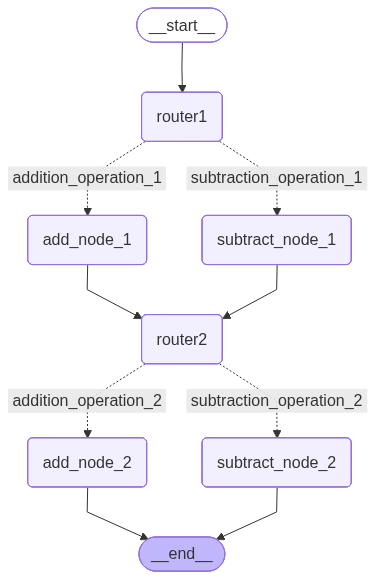

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state = AgentState(number1= 10, operation1="-", number2=5, number3=7, number4=2, operation2="+")
print(app.invoke(initial_state))

{'number1': 10, 'operation1': '-', 'number2': 5, 'finalNumber1': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber2': 9}
